In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [109]:
df_avec_details_financiers=pd.read_parquet("datasets_finaux/dataset_avec_details_financiers.parquet", engine="pyarrow")
df_avec_details_financiers=df_avec_details_financiers.drop(["siren"],axis=1) 


In [110]:
proportion_survie_avec_details = (df_avec_details_financiers['etatAdministratifUniteLegale'] == 1).mean() 

In [111]:
def split(dataset,seed=42,yes_validation=True):
    x=dataset.drop(["etatAdministratifUniteLegale"],axis=1)
    y=dataset["etatAdministratifUniteLegale"]
    if(yes_validation==True): #crée un validation set
        x_train, x_temp, y_train, y_temp = train_test_split( x, y, test_size=0.3, random_state=seed,stratify=y ) 
        x_validation, x_test, y_validation, y_test = train_test_split( x_temp, y_temp, test_size=0.5, random_state=seed,stratify=y_temp )
        return x_train,x_test,y_train,y_test,x_validation, y_validation
    else:
        x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=seed,stratify=y )
        return x_train,x_test,y_train,y_test


In [ ]:
# cols_to_drop = [
#     'nombrePeriodesUniteLegale', 
#     'anneeCategorieEntreprise', 
#     'anneeEffectifsUniteLegale', # Même problème que anneeCategorie
#     'trancheEffectifsUniteLegale', # Si c'est la donnée 2025
#     'nbEtablissements',            # Si c'est la donnée 2025
#     'categorieEntreprise'          # Souvent corrélé à la survie par définition
# ]
# df_avec_details_financiers = df_avec_details_financiers.drop(cols_to_drop, axis=1, errors='ignore')

In [112]:

df_avec_details_financiers.describe()

,trancheEffectifsUniteLegale,anneeEffectifsUniteLegale,nombrePeriodesUniteLegale,categorieEntreprise,anneeCategorieEntreprise,etatAdministratifUniteLegale,activitePrincipaleUniteLegale,economieSocialeSolidaireUniteLegale,societeMissionUniteLegale,nbEtablissements,...,Poids_BFR_exploitation_sur_CA_jours_std,Rotation_des_stocks_jours_tcam,Rotation_des_stocks_jours_moyen,Rotation_des_stocks_jours_std,Credit_clients_Jours_tcam,Credit_clients_Jours_moyen,Credit_clients_Jours_std,Credit_fournisseurs_Jours_tcam,Credit_fournisseurs_Jours_moyen,Credit_fournisseurs_Jours_std
count,36388.000000,36388.000000,36388.000000,36388.000000,36388.000000,36388.000000,36388.000000,36388.000000,36388.000000,36388.000000,...,1.020800e+04,36388.000000,24987.000000,10208.000000,3.638800e+04,2.585800e+04,1.057500e+04,36388.000000,30949.000000,13938.000000
mean,0.624959,716.122430,1.908047,0.883148,1682.701468,0.753985,6727.183659,-0.780312,-0.016132,1.597065,...,7.480287e+03,1.086114,50.105515,29.575152,8.025136e+01,2.317237e+02,2.344777e+02,88.274032,214.452532,268.215527
std,3.908498,967.424448,1.100800,0.477692,756.727545,0.430693,472.703869,0.432862,0.126636,1.176745,...,4.205706e+05,84.146487,2625.122854,1495.061791,7.554200e+03,1.048151e+04,1.466719e+04,1681.567562,5650.914279,8450.623203
min,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2611.000000,-1.000000,-1.000000,1.000000,...,0.000000e+00,-100.000000,-7908.827000,0.000000,-1.000000e+02,-6.303175e+03,0.000000e+00,-100.000000,-248329.335000,0.000000
25%,-1.000000,0.000000,1.000000,1.000000,2023.000000,1.000000,6202.000000,-1.000000,0.000000,1.000000,...,1.701162e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,4.285750e+00,0.000000,5.921000,3.389625
50%,-1.000000,0.000000,2.000000,1.000000,2023.000000,1.000000,7022.000000,-1.000000,0.000000,1.000000,...,4.112625e+01,0.000000,0.000000,0.000000,0.000000e+00,4.413933e+01,1.826750e+01,0.000000,36.996000,16.578250
75%,1.000000,2023.000000,2.000000,1.000000,2023.000000,1.000000,7022.000000,-1.000000,0.000000,2.000000,...,1.052288e+02,0.000000,0.000000,0.000000,0.000000e+00,1.053450e+02,4.911150e+01,0.000000,109.442000,54.519575
max,51.000000,2023.000000,12.000000,3.000000,2023.000000,1.000000,7219.000000,1.000000,1.000000,47.000000,...,3.982060e+07,12180.645161,288555.607000,138140.380773,1.421818e+06,1.255464e+06,1.479579e+06,125602.515723,599914.651667,847892.913646


In [113]:
x_train,x_test, y_train,y_test,x_val, y_val = split(df_avec_details_financiers,yes_validation=True)

In [114]:
cols_to_fill = [col for col in x_train.columns 
                if col.endswith(('_moyen', '_std'))]

medians_train = x_train[cols_to_fill].median()



for col in cols_to_fill:
    x_train[col] = x_train[col].fillna(medians_train[col])
    
for col in cols_to_fill:
    x_val[col] = x_val[col].fillna(medians_train[col])

for col in cols_to_fill:
    x_test[col] = x_test[col].fillna(medians_train[col]) #pour éviter la triche

In [115]:
# nombre de nans dans chacun des datasets
print(x_train.isna().sum().sum())
print(x_test.isna().sum().sum())
print(x_val.isna().sum().sum())

0
0
0


In [116]:
print(f"Taille du jeu d'entraînement: {x_train.shape[0]} échantillons comprenant {x_train.shape[1]} caractéristiques")
print(f"Taille du jeu de test: {x_test.shape[0]} échantillons comprenant {x_test.shape[1]} caractéristiques")
print(f"Taille du jeu de validation: {x_val.shape[0]} échantillons comprenant {x_val.shape[1]} caractéristiques")

Taille du jeu d'entraînement: 25471 échantillons comprenant 66 caractéristiques
Taille du jeu de test: 5459 échantillons comprenant 66 caractéristiques
Taille du jeu de validation: 5458 échantillons comprenant 66 caractéristiques


Création d'un réseau dense

In [117]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary

In [118]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_val_scaled = scaler.transform(x_val)
X_test_scaled = scaler.transform(x_test)

In [119]:
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1) # Pour Binary Cross Entropy

X_val_t = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_t = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# 3. Création des DataLoaders
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=64)

In [120]:
class ModelBase(nn.Module):
    def __init__(self, input_dim):
        super(ModelBase, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            
            nn.Linear(128, 32),
            nn.ReLU(),
            
            nn.Linear(32, 1),
            nn.Sigmoid() # Pour une prédiction de probabilité (0 à 1)
        )
        
    def forward(self, x):
        return self.network(x)

input_dim = X_train_t.shape[1]
model_base = ModelBase(input_dim)

In [121]:
class LightPredictor(nn.Module):
    def __init__(self, input_dim):
        super(LightPredictor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    def forward(self, x): return self.network(x)

# Modèle 2 : Architecture Profonde (Plus de couches et de neurones)
class DeepPredictor(nn.Module):
    def __init__(self, input_dim):
        super(DeepPredictor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256), # Stabilise l'apprentissage
            nn.ReLU(),
            
            nn.Linear(256, 128),
            nn.ReLU(),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x): return self.network(x)
    
class DropPredictor(nn.Module):
    def __init__(self, input_dim):
        super(DropPredictor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128), # Stabilise l'apprentissage
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x): return self.network(x)
    

# Initialisation
model_light = LightPredictor(input_dim)
model_deep = DeepPredictor(input_dim)
model_drop = DropPredictor(input_dim)

Choix des paramètres du modèle

In [ ]:
model = model_base
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 20

In [150]:
# model summary
summary(model, input_size=(input_dim,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]           2,144
              ReLU-2                   [-1, 32]               0
            Linear-3                    [-1, 1]              33
           Sigmoid-4                    [-1, 1]               0
Total params: 2,177
Trainable params: 2,177
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [151]:


train_losses, val_losses = [], []

for epoch in range(epochs):
    model.train()
    batch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        batch_loss += loss.item()
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_t)
        v_loss = criterion(val_outputs, y_val_t)
    
    train_losses.append(batch_loss / len(train_loader))
    val_losses.append(v_loss.item())
    
    if (epoch+1) % 2 == 0:
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f}")

Epoch 2/20 | Train Loss: 0.1472 | Val Loss: 0.2000
Epoch 4/20 | Train Loss: 0.1461 | Val Loss: 0.1794
Epoch 6/20 | Train Loss: 0.1468 | Val Loss: 0.1798
Epoch 8/20 | Train Loss: 0.1448 | Val Loss: 0.1667
Epoch 10/20 | Train Loss: 0.1445 | Val Loss: 0.1965
Epoch 12/20 | Train Loss: 0.1442 | Val Loss: 0.1842
Epoch 14/20 | Train Loss: 0.1435 | Val Loss: 0.1852
Epoch 16/20 | Train Loss: 0.1430 | Val Loss: 0.1695
Epoch 18/20 | Train Loss: 0.1436 | Val Loss: 0.1724
Epoch 20/20 | Train Loss: 0.1471 | Val Loss: 0.1842


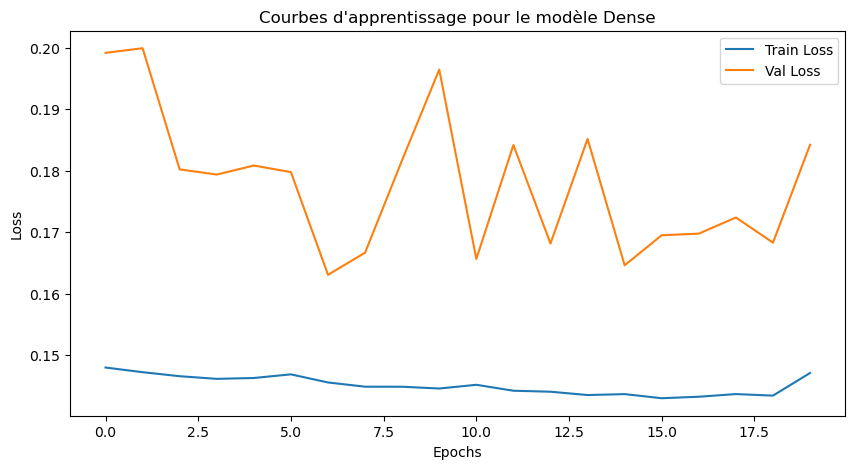


Précision finale sur le dataset de test : 92.76%


In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Courbes d\'apprentissage pour le modèle Dense')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluation finale sur Test
model.eval()
with torch.no_grad():
    y_pred_prob = model(torch.tensor(X_test_scaled, dtype=torch.float32))
    y_pred = (y_pred_prob > 0.5).float()
    accuracy = (y_pred.eq(torch.tensor(y_test.values).unsqueeze(1)).sum() / len(y_test)).item()
    print(f"\nPrécision finale sur le dataset de test : {accuracy:.2%}")

In [153]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [154]:


def evaluate_model(model, X_test_tensor, y_test_true, title="Modèle"):
    model.eval()
    with torch.no_grad():
        y_probs = model(X_test_tensor)
        y_preds = (y_probs > 0.5).float().numpy()
        
    cm = confusion_matrix(y_test_true, y_preds)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Cessé (0)', 'Actif (1)'], 
                yticklabels=['Cessé (0)', 'Actif (1)'])
    plt.xlabel('Prédiction')
    plt.ylabel('Réalité')
    plt.title(f'Matrice de Confusion : {title}')
    plt.show()
    
    print(f"--- Rapport de classification : {title} ---")
    print(classification_report(y_test_true, y_preds))
    print("\n")
    print("F1 Score:", f1_score(y_test_true, y_preds))
    print("recall:", cm[1,1]/(cm[1,0]+cm[1,1]))
    print("precision:", cm[1,1]/(cm[0,1]+cm[1,1]))
    print("accuracy:", (cm[0,0]+cm[1,1])/np.sum(cm))
    # ROC score
    roc_score = auc(*roc_curve(y_test_true, y_probs.numpy())[:2])
    print("ROC AUC Score:", roc_score)

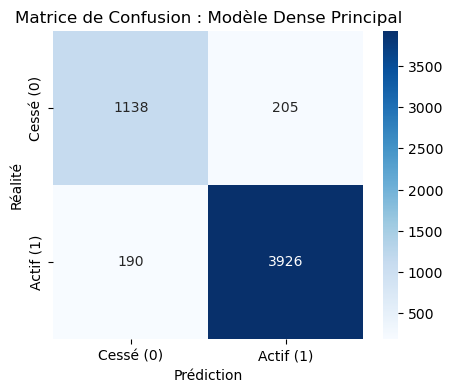

--- Rapport de classification : Modèle Dense Principal ---
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1343
           1       0.95      0.95      0.95      4116

    accuracy                           0.93      5459
   macro avg       0.90      0.90      0.90      5459
weighted avg       0.93      0.93      0.93      5459



F1 Score: 0.9521037953195102
recall: 0.9538386783284742
precision: 0.9503752118131203
accuracy: 0.9276424253526286
ROC AUC Score: 0.9779483221860172


In [155]:
evaluate_model(model, torch.tensor(X_test_scaled, dtype=torch.float32), y_test.values, title="Modèle Dense Principal")